# California housing data set

I'm going to train an SVM regressor on the California housing data set. The data set can be found at [Aurélien Geron's GitHub web site](https://github.com/ageron/handson-ml/tree/master/datasets/housing). The README at the web site gives a good explanation of the data set.

Let's start by doing some exploratory data analysis.

 - [Exploratory data analysis](#Exploratory-data-analysis)

## Exploratory data analysis

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [51]:
PROJECT_ROOT_DIR = '/Users/angelo/Programming/Python/ageron-hands-on-machine-learning'
file_name = os.path.join(PROJECT_ROOT_DIR, 'datasets/housing/housing.csv')

In [52]:
housing_df = pd.read_csv(file_name)
category = list(housing_df.select_dtypes('object').columns)
housing_df[category] = housing_df[category].astype('category')
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null category
dtypes: category(1), float64(9)
memory usage: 1.4 MB


In [6]:
housing_df.isnull().sum()

longitude             0  
latitude              0  
housing_median_age    0  
total_rooms           0  
total_bedrooms        207
population            0  
households            0  
median_income         0  
median_house_value    0  
ocean_proximity       0  
dtype: int64

We can see that there are 207 null values for the `total_bedrooms` feature. We will need to address this, and one way is to use the median to fill in the null values for example.

In [17]:
housing_df.describe().applymap('{:.2f}'.format)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


In [8]:
housing_df.nunique()

longitude             844  
latitude              862  
housing_median_age    52   
total_rooms           5926 
total_bedrooms        1923 
population            3888 
households            1815 
median_income         12928
median_house_value    3842 
ocean_proximity       5    
dtype: int64

In [9]:
housing_df.ocean_proximity.unique()

[NEAR BAY, <1H OCEAN, INLAND, NEAR OCEAN, ISLAND]
Categories (5, object): [NEAR BAY, <1H OCEAN, INLAND, NEAR OCEAN, ISLAND]

Let's generate a pairwise grid plot for some of the numerical features in the data set. We'll plot the geographic coordinates in the next plot.

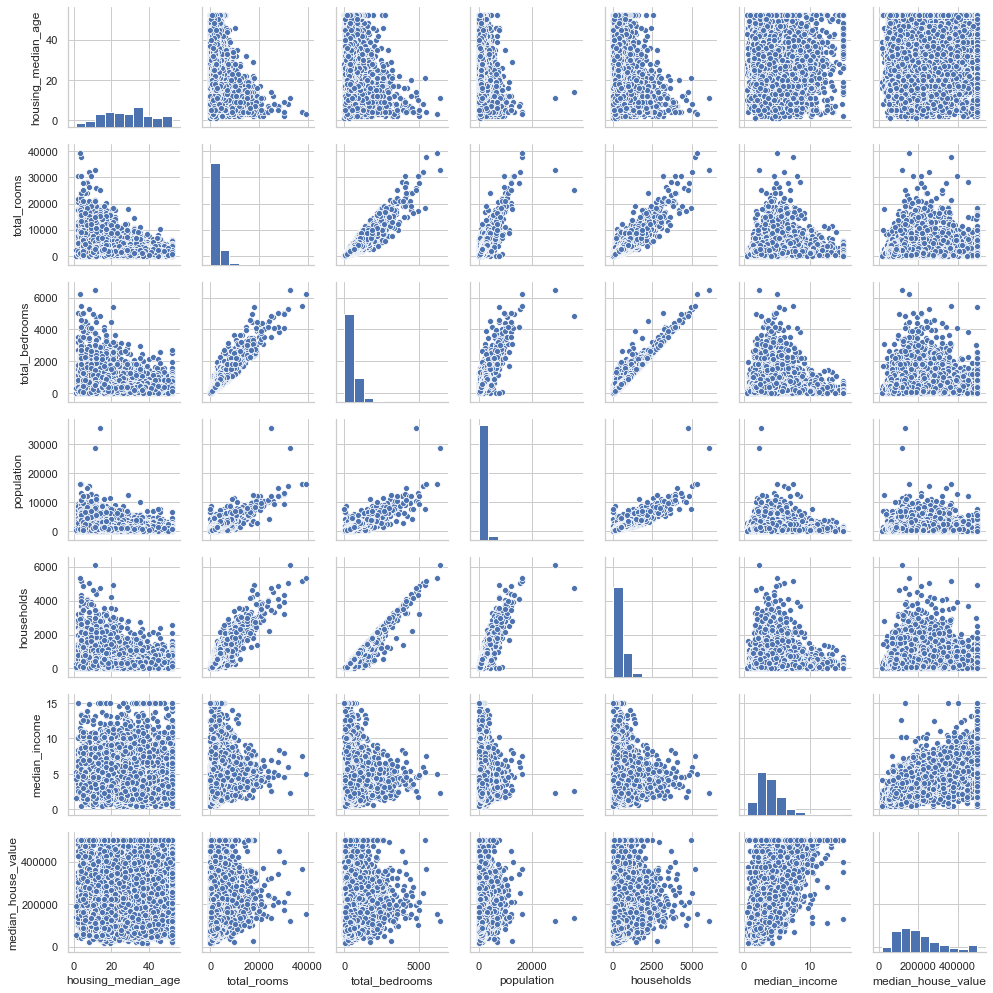

In [48]:
sns.set(style="whitegrid")
cols = housing_df.columns[2:-1]
sns.pairplot(data=housing_df[cols], kind='scatter', palette='husl', diag_kind='hist', height=2)
plt.tight_layout();

Here we can see the geographical districts color-coded for median house price. The San Francisco bay area and the greater Los Angeles / San Diego area are notoriously expensive.

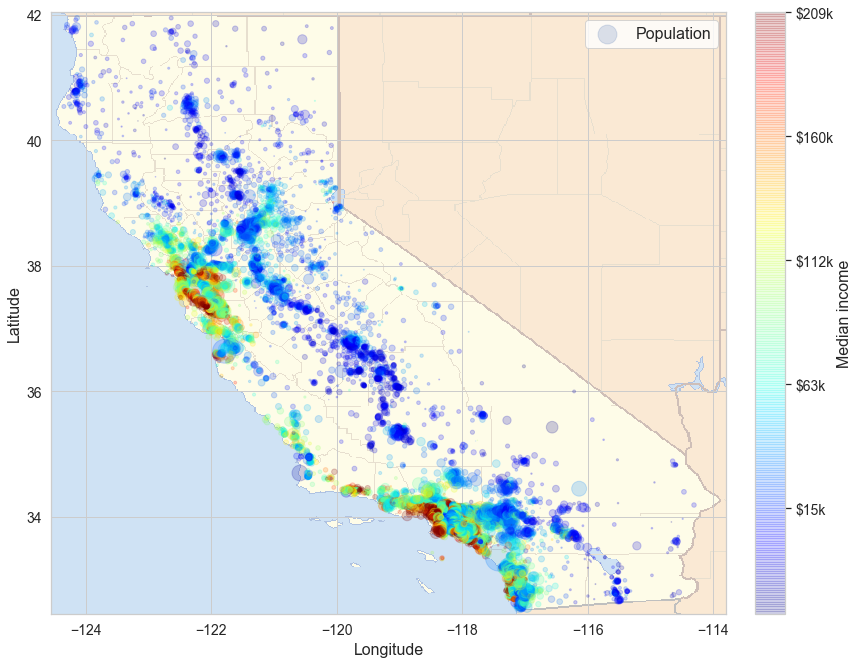

In [117]:
import matplotlib.image as mpimg
california_img = mpimg.imread(PROJECT_ROOT_DIR + '/images/end_to_end_project/california.png')

fig, axes = plt.subplots(1, 1, figsize=(12, 10))
lat, long, pop, med_price = housing_df.iloc[:, 0], housing_df.iloc[:, 1], housing_df.iloc[:, 5], housing_df.iloc[:, -2]
g = axes.scatter(lat, long, c=med_price, s=pop/50, cmap=plt.cm.jet, alpha=0.2, label='Population')

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5, cmap=plt.cm.jet)

plt.ylabel("Latitude", fontsize=16)
plt.xlabel("Longitude", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

tick_values = np.linspace(med_price.min(), med_price.max(), 11)
cbar = plt.colorbar(g, fraction=0.041, pad=0.04)
cbar.ax.set_yticklabels(['{}{:.0f}{}'.format('$', np.around(v/1000), 'k') for v in tick_values], fontsize=14)
cbar.set_label('Median income', fontsize=16)

plt.legend(loc='best', fontsize=16)
plt.tight_layout();